# Knapsack

In [1]:
import drawSvg as draw
import networkx as nx
import matplotlib.pyplot as plt

In [66]:
dt = DrawingTable()

Knapsack is a well-known NP-Hard problem in its general version and NP-Complete in its decisional version.<br>

In the general case, we have $n$ items, each one with a specific value $v_i$ and weight $w_i$; we also have a maximum capacity $W$ for the knapsack; we want to find a set of items fitting into the knapsack that maximizes the total value.

The problem can be formulated in many ways and each variant has many approaches. 

### Fractional Knapsack

A first interesting formulation is the **Fractional Knapsack**. In this case items can be partitioned, so for each one of them we can take just the portion we need to reach the maximum revenue.

A good **idea** to solve the problem under this conditions is using a **greedy approach**: 
+ we compute the ratio
$
\begin{align*}
\frac{v_i}{w_i}
\end{align*}
$
for every item 
+ we sort them according to this ratios in non increasing order
+ we take all items (interely) starting from the ones with higher ratio, up to the point where we reach an item $k$ for which<br><br>
$
\quad\quad\quad
\begin{align*}
\sum_{i=1}^{k-1}{w_i} \leq W
\end{align*}
$
and
$
\begin{align*}
\sum_{i=1}^{k}{w_i} > W
\end{align*}
$<br><br>
+ We take just the first portion of the k-th item, $\tilde{w}_k$, in such a way that<br><br>
$
\quad\quad\quad
\begin{align*}
\sum_{i=1}^{k-1} {w_i} + \tilde{w}_k = W
\end{align*}
$

Here is the code for this solution:

In [38]:
v = [1, 2, 3, 4, 10, 6, 7]
w = [3, 4, 5, 6, 7, 8, 9]
n = len(v)
W = 17

def frac_knapsack():
    lW = W
    r = [(e, i) for (i, e) in enumerate([float(vi)/float(wi) for (vi, wi) in zip(v, w)])]
    r.sort(reverse=True)
    r = [i for (e, i) in r]
    
    i, vr = 0, 0
    S = set()
    while lW - w[r[i]] >= 0:
        vr += v[r[i]]
        lW -= w[r[i]]
        i += 1
    
    if lW > 0:
        vr += float(lW)/float(w[r[i]])*v[r[i]]
    
    return vr

vr = frac_knapsack()
print(vr)

17.75


The solution for this formulation of the problem will be useful when discussing approximate solutions for the version of the problem we are going to consider next.

### 0/1-Knapsack

The formulation we are mostly interested in is the **0/1-Knapsack** problem. In this case we can only decide if we need to take an item or not, we cannot just take a part of it.

We first see a possible application of the problem and then a more general formulation of this version of the problem.

#### Application Example

We want to implement a file download manager on a server which can transfer data on blocks of $W$ bytes.

**Input**: $n$ files, for each of them we know:
+ size: $w_1, w_2, ..., w_n$
+ value: $v_1, v_2, ..., v_n$
+ dimension of the block: $W$

**Goal**: find a subset of the $n$ files to transfer all together staying withing W bytes and maximizing the value of the files without splitting them.

#### General Formulation

In its general version, the 0/1-Knapsack (or simply Knapsack from now on) accepts $n$ items with their values and weights and tries to fit them inside the knapsack of capacity $W$ without spitting.

**Input**:<br>
+ integer $W$, the max capacity
+ integer array $w[]$ of (positive) weights for the $n$ objects
+ integer array $v[]$ of values for the $n$ items

**Output**:
+ a subset $S \subseteq [1..n]$ which maximizes $\sum_{i \in S} v[i]$ under the constraint $\sum_{i \in S} w[i] \leq W$ as we want $S$ to fit into the knapsack.

Our goal is to find total value for the best possible set $S^*$. We can also find $S^*$ itself with additional polynomial time. <br>
In this general formulation Knapsack problem is NP-Hard.

If we want to know if for the given input there is a subset $S$ for which $\sum_{i \in S} v[i] \geq \alpha$ then we have a NP-Complete problem, as in this case we have a decisional problem.

Knapsack is a restricted version of a more general problem, **Partition**. In this problem we want to split a multiset of integers into two groups so that they have the same sum.

Knapsack problem is a good and illustrative example for studying NPC and NPH problems. It is a hard problem and we will figure this out by aplying the most naive approach, i.e. the **brute-force approach**. Then we will see two possible ways of finding an **exact and optimal solution** and, at last, a couple of ways to **approximate an optimal solution** in polynomial time.

## Brute-Force Approach

The first possible approach is the Brute-Force enumeration of all possible subsets S to find the best one.<br>
The cost of this approach is $\tilde{O}(2^n)$, where $n$ is the number of objects in input.
>**Note**: with $\tilde{O}$ notation we ignore polynomial factors:
$$
\tilde{O}(f(n))=O(f(n) \cdot n^{O(1)})
$$

Following this approach is equal to generating all binary sequences $B$ of length $n$ such that $S = \{i \in [1..n]: B[i]=1\} $ and $\sum_{i \in S} w[i] \leq W$ and then taking the one that maximizes the total value for the chosen values.

The following code applies the approche we have described and prints datas and the resulting optimal set, together with the optimal value coming from it.

In [33]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 13

best, bestS = 0, set()

def bruteForce(S = set(), size = 0, sum = 0, i = 0):
    global best, bestS
    if(i >= n):
        if(sum > best):
            best = sum
            bestS = S
    else:
        bruteForce(S, size, sum, i+1)
        if(size + w[i] <= W):
            bruteForce(S.union({i+1}), size + w[i], sum + v[i], i+1)
    
bruteForce()

In [34]:
dt.printData(v, w, S=bestS, val=best, type="bf")

In the following plot we can see a graphical representation for the previous example. At each level we can choose two possible paths:
+ if we **take** the current element we go to the right
+ if we do **not take** the current element we go to the left.


Exploring all possible paths we eventually find the best one that maximizes the sum of the values.<br>
In the following plot the optimal path is enlightened in orange.

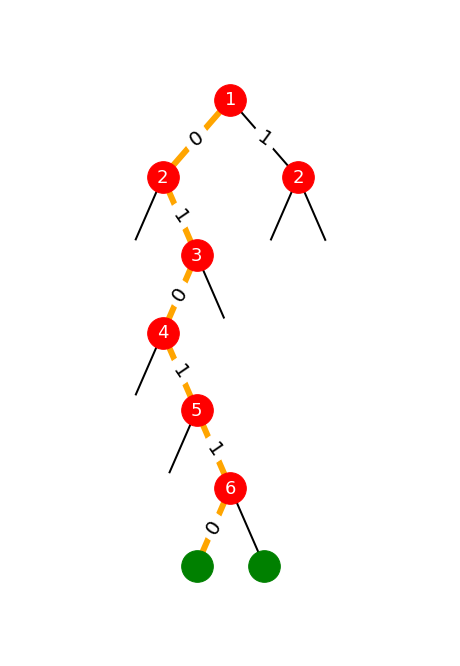

In [515]:
plot_bf()

> $S = \{2, 4, 5\}$

## Dynamic Programming

Another possible approach to solve the Knapsack problem is to use Dynamic Programming.

The basic idea is to solve the main problem combining the solutions of its possible subproblems.<br>
These subproblems can be defined considering:
+ the subsets of the first $k$ items, $\forall k, 0 \leq k \leq n$
+ all possible values for the capacity, from $0$ to $W$

Combining all the possibilities, we get a total of $n * W$ subproblems, with one of them being the original one we want to solve.<br>
To solve all these problems we can build a table where each cell stores the optimal value for a given subproblem; we can then start filling the table starting from the easiest subproblems and then compute the solutions for more difficult ones from the solutions we've already computed.

Finding the optimal value for the cell $T[i][j]$ in the table means finding the solution for the subproblem considering just the first $i$ of the $n$ items while having a maximum capacity of $j$.

Since any subproblem can be solved from easier ones, we can fill the table row after row, from the top to the bottom, going from the left to the right inside each row.

When we reach the point of filling the cell $T[i][j]$ in the table, we have two alternatives and we have to choose between them:
+ we exclude the $i-th$ element from the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j]$
+ we include the $i-th$ element into the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j-w_i] + v_i$; in fact, if we want to take the $i-th$ element, we have to consider a previous solution in which it surely fits, thus decreasing the value of $j$ by $w_i$

Notice that, if the weight of the $i-th$ element is greater than the capacity for the current subproblem, we cannot include it inside the optimal set and we have no choice but to consider the option in whit it is excuded.

The solution for the cell $T[i][j]$ is the maximum value among those we get from the above options.

For the base cases, we have that the first row and the first column are filled in with $0$s, since if we have no item or if we have a maximum capacity of $0$ the best value we can get is always $0$.

The solution for the original problem can be found in $T[n][W]$.

In the following table we can see a visual representation of the solution for $T[i][j]$.

In [440]:
optimal_table(version="W")

In the following formula we can see exactly how each subproblem can be solved. 

> $
T[i][j] =
\begin{cases} 
0 & if \quad i=0\\
0 & if \quad j=0\\
T[i-1][j] & if \quad j<w_i\\
max\{\\ \quad T[i-1][j], \\ \quad T[i-1][j-w_i]+v_i\;\} & otherwise
\end{cases}
$

The following code computes the dynamic programming solution we've discussed so far. The input is the same we've used for the brute-force approach and we can see that the solution we get is the same.

In [57]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 13
    
def dp1():
    T = [[0 for j in range(W+1)] for i in range(n+1)]
    
    #filling the table
    for i in range(1, n+1):
        for j in range(1, W+1):
            if(w[i-1] > j): 
                T[i][j] = T[i-1][j]
            else:
                T[i][j] = max(T[i-1][j], T[i-1][j - w[i-1]] + v[i-1])
    
    #computing optimal set
    S, i, j = set(), n, W
    while(i>0 and j>0):
        if w[i-1] <= j:
            if T[i-1][j-w[i-1]] + v[i-1] > T[i-1][j] :
                S = S.union({i})
                j = j - w[i-1]
        i = i-1

    return (T, S, T[n][W])
    
T, bestS, best = dp1()
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp1")

The total cost of this algorithms is $O(n*W)$, since it simply fills up a table with $n+1$ rows and $W+1$ columns, taking $O(1)$ to fill each cell.

The computational cost of this algorithm is considered **pseudo-plynomial** as it depends on the value of $W$ and not on the space it occupies (being it an input parameter); since this value can be very high, the table can become very big and the time to find the solution can explode.

#### How to find the optimal set 

Once we have the table completely filled, we can retrieve the optimal set in linear time.

Starting from the cell $T[n][W]$ where we can find the optima value for the complete problem, we go back to the subproblems that contribute to generate this solution. For a general subproblem $T[i][j]$:
+ if $w_i > j$ we go back to subproblem $T[i-1][j]$ and we discard the $i-th$ element
+ otherwise, we check the maximum between:<br><br>
 + $T[i-1][j-w_i] + v_i$
 + $T[i-1][j]$<br>



> In this case we choose the best one, then, if we've chosen the former option we include the $i-th$ item in the optimal set and move to the subproblem $T[i-1][j- w_i] + v_i$; if we've chosen the latter, we exclude the current item and we move to the subproblem $T[i-1][j]$.
+ we repeat this procedure until we get to the first row.

Since we have a computaional cost of $O(1)$ for each row, we have a total cost of $O(n)$ to find the optimal set.

In the following table we can see a visual representation of how we can retrieve the optimal set from the complete table.

In [64]:
dt.printSet(v, w, W=W, val=best, S=bestS, T=T, type="dp1")

### Dynamic Programming - Profit Knapsack

There is another way to solve the Knapsack problem using Dynamic Programming, called the **Profit Knapsack** approach: we can split the main problem in subproblems as before, but this time we consider:
+ the subsets of the first $k$ items, $\forall k, 0 \leq k \leq n$
+ all possible optimal values, from $0$ to $n * v_{max}$, where $v_{max}$ is the maximum value among all items.

The approach is much similar to the one we0ve just seen:we build a table where each cell is the optimal solution for a subproblem and we fill every cell computing its value starting from the solutions of subproblems we've already considered.

This time, though, each subproblem $T[i][j]$ requires us to find the subset of the first $i$ items with a total value of **at least** $j$ that minimizes the sum of their weights.

As before, when we have to fill the cell $T[i][j]$ in the table, we have two alternatives and we have to choose between them:
+ we exclude the $i-th$ element from the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j]$
+ we include the $i-th$ element into the optimal set, meaning that the solution for $T[i][j]$ is the same as the one for $T[i-1][j-v_i] + w_i$; in fact, to take the $i-th$ element, our best coiche is to go back $v_i$ columns to make the total weight as low as possible, mantaining the total value at least equal to $j$.

Notice that, if for the current item $i$ we have that $v_i > j$, we can still choose to pick the $i-th$ item; in this case, though, we will minimize between the option of not picking it, paying $T[i-1][j]$, or picking only that item alone, paying only its weight $w_i$. In fact, in this second case, our best option is go back up to the first column to minimize the total weight still staying above a value of $j$, paying, thus, $0+w_i$, since $T[i-1][0]=0$.

Considering the base cases, we have that all the first column is filled in with $0s$ since to reach at least a value of 0 we can just exclude all items; all the first row, except for the first cell, is filled in with $+\infty$ since to reach at least a value of $j\geq1$ with no items we pay, ideally, an infinite weight.

**Note**: an important property of this solution is that, in every row, all values are non decreasing from left to right. In fact, in the first column we will always have the value of $0$; in a certain row $i$, we have that the value for the cell will be equal to $v_i$ until $v_i = j$ or it will be consistent with the ones from the row above, depending on wich walue is the smallest; from that point on the value in the same row can only increase or stay the same as can be seen from the formula defining the solution for $T[i][j]$.

The optimal value for the problem can be found looking at the last row: here, for each column, we have the minimum weight that grants the total value to be at least $j$; since values always increase in each row, going from left to right in the last row we reach a cell which is the last one with a value **less or equal than $W$**; the total value corresponging to this cell is the best we can get, since to get a value of at least the one represented by the following column we need a total weight that exceeds the maximum capacity.

The following table is a visual representation of what has been discussed so far.

In [439]:
optimal_table(version="Vmax")

The following formula simply states in a precise way how the solution for the subproblem $T[i][j]$ can be found.

>$
T[i][j] =
\begin{cases} 
    0 & if \quad j=0, \;\forall\: 0 \leq i \leq n\\
    +\infty & if \quad i=0, \;\forall\: 1 \leq j \leq n*v_{max}\\
    min\{ T[i-1][j], w_i \} & if \quad j<v_i\\
    min\{\\ \quad T[i-1][j], \\ \quad T[i-1][j-v_i]+w_i\;\} & otherwise
\end{cases}
$

The following code solves the Knapsack problem using the profit approach. Notice that, instead of the infinity value in the first row we have used the sum of all the possible weights increased by one, a value that cannot be reached in the computation.

In [67]:
v = [2, 7, 4, 10, 11, 1]
w = [14, 2, 6, 3, 8, 13]
n = len(v)
W = 13

def dp2():
    vmax = max(v)
    wsum = sum(w) + 1
    
    T = [[wsum for j in range(n*vmax + 1)] for i in range(n+1)]
    
    #filling the table
    for i in range(n+1):
        T[i][0] = 0
    for i in range(1, n+1):
        for j in range(1, n*vmax + 1):
            if(v[i-1] > j): 
                T[i][j] = min(T[i-1][j], w[i-1])
            else:
                T[i][j] = min(T[i-1][j], T[i-1][j - v[i-1]] + w[i-1])

    #computing optimal solution
    res = -1
    while(res < n*vmax and T[n][res+1] <= W):
        res = res + 1
    
    #computing optimal set
    S, i, j = set(), n, res
    while(i>0 and j>0):
        if(v[i-1] > j): 
            if w[i-1] < T[i-1][j] :
                S = S.union({i})
                break
        else:
            if T[i-1][j-v[i-1]] + w[i-1] < T[i-1][j] :
                S = S.union({i})
                j = j - v[i-1]
        i = i-1

    return (T, S, res)

T, bestS, best = dp2()
dt.printData(v, w, W=W, val=best, S=bestS, T=T, type="dp2")

The total cost in time for this solution is $O(n^2*v_{max})$, since we have to fill a table with $n+1$ rows and $n*v_{max}+1$ columns.

As before, we have a pseudo-polynomial solution, since it depends on the value of $v_{max}$ and not on the space we need to represent it (being it a input value). The cost for this solution can grow as fast as the previous one.

**Note**: since we now, know two possible solutions involving dynamic programming we can choose, from time to time the one with the smaller value between $W$ and $n*v_{max}$. If one of them is significantly smaller than the other, we can get very good performace, but if this does not happen we can always go trhough a very bad scenario.

#### How to find the optimal set 

As before, we can compute the optimal set once we have the table completely filled.<br>
Assuming that $V$ is the optimal value we have found during the computation, we start from $T[n][V]$ ang we go back to previous subproblems as we did before. For a general subroblem $T[i][j]$:
+ if $v_i > j$ we check the minimum between<br><br>
    + $T[i-1][j]$
    + $w_i$

> We choose the best option and in the first case we exclude the $i-th$ element from the optimal set, while in the second one we include it.<br>
If we choose the former option, we move to the subproblem $T[i-1][j]$. If we choose the latter we simply stop searching, since we cannot have more items in the optimal set; in fact, in this case we should ideally move to subproblem $T[i-1][0]$ and from there we can only go up until we reach the first row, excluding all the following items.

+ if $v_i \leq j$ we check the minimum between:<br><br>
 + $T[i-1][j]$
 + $T[i-1][j-v_i] + w_i$

> In this case, we simply take the best option and if we choose the former option we exclude the element and move to the subproblem $T[i-1][j]$, while in the latter we include the element in the optimal set and move to subproblem $T[i-1][j-v_i] + w_i$.

+ we repeat this procedure until we get to the first row or the first column.

As before, since we have a computaional cost of $O(1)$ for each row, we have a total cost of $O(n)$ to find the optimal set.

In the following table we can see a visual representation of how we can retrieve the optimal set from the complete table.

In [68]:
dt.printSet(v, w, W=W, val=best, S=bestS, T=T, type="dp2")

### Summing up

We've seen three possible ways to solve the Knapsack problem, summarized below. As we've seen the best we can get if we want an exact solution is an algorithm which runs in pseudo-polynomial time.<br>
We will see now how to get a real polynomial time algorithm at the cost of an approximate solution.

| **Solution** | **Cost in Time** |
|:------------:|:--------:|
|Brute Force| $\tilde{O}(2^n)$ |
|DP1| $O(n*W)$ |
|DP2| $O(n^2*V_{max})$ |

## Approximation Algorithms

We will now see how we can find a reasonable approximate solution for the Knapsack problem paying a polynomial time.<br>
We will firstly define what an **r-approximation** is for an NP-Hard problem and then we're going to find a **2-aproximation** for the Knapsack Problem.<br>
At last, we will see a **FPTAS** algorithm for our problem.

### r-approximation

A really useful tool we can use when we need to approximate the optimal solution for an NP-Hard problem $\Pi$, we generally can have two cases:
+ we're dealing with a **minimization problem**, so we need to **minimize** its **cost**
+ we're dealing with a **maximization problem**, so we need to **maximize** its **benefit**


We assume an optimal solution $S^*$ for $\Pi$ exists and it has a cost $cost(S^*)= \text{OPT}$.

**Def. : r-approximation**
>An **r-approximation**, with $r>1$, gives a solution $S$ such that:<br><br>
$
\begin{align}
\quad\quad\quad minimization: \frac{cost(S)}{\text{OPT}} \leq r
\quad\quad\quad maximization: \frac{\text{OPT}}{cost(S)} \leq r
\end{align}
$<br><br>
Sometimes the maximization case is equivalently called 
$
\begin{align}
\frac{1}{r}-\text{approximation}
\end{align}
$
as we can write:<br><br>
$
\begin{align}
\quad\quad\quad maximization: cost(S) \leq \frac{1}{r}~\text{OPT}
\end{align}
$<br><br>

Notice that, even though in the maximization case we want to maximize the benefit, we call it $cost(S)$ anyway.

In many cases, this kind of algorithms can be really useful if they can give us a good approximation ($r$ sufficiently low) in polynomial time.

### 2-approximation

Now we'll see how to apply this idea to the **Knapsack** problem and how we can reach an approximation factor of **$2$**. Similarly as before, the problem is stated as follows:


**Input**:
+ $n$ items
+ array of values $v[]$, where $\forall i \in [1..n] . v_i > 0$
+ array of weights $w[]$, where $\forall i \in [1..n] . w_i > 0$
+ capacity $W > 0$

**Output**:
a subset $S \subseteq [1..n]$ such that:
+ the total weight of items in $S$ stays below the capacity: $\sum_{i \in S} w_i \leq W$
+ the total value of items in $S$, $\;\sum_{i \in S} v_i\;$,  is minimized

#### First Idea

As a first idea to reach a **2-approximation**, we can use a greedy aproach, much similar to the one we've seen at the beginning for the **Fractional Knapsack**: we give priority to items with higer 
$
\begin{align}
\;\frac{v_i}{w_i}\;
\end{align}
$ratio, i.e. to the most valuable items.

We can suppose, w.l.o.g., that items are numbered as follows:<br><br>
$
\begin{align}
\quad\quad\quad \frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq ~...~ \geq \frac{v_n}{w_n}
\end{align}
$<br><br>
if it's not the case, we can always renumber them in such a way that the above property holds.

Now we can define a simple **greedy** algorithm, where we pick all the items starting from the beginning of the list, until we have room inside the knapsack.

The following code shows how to implement this simple solution and runs over the same example we used before, just with the items sorted in non increasing order by their ratio ($f$ in the output of the code).

In [48]:
def greedy():
    global W
    S = set()
    for i in range(n):
        if(w[i] <= W):
            S = S.union({i})
            W = W - w[i]
    costS = 0
    for i in S:
        costS = costS + v[i]
    return (S, costS)

In [49]:
v = [7, 10, 11, 4, 2, 1]
w = [2, 3, 8, 6, 14, 13]
n = len(v)
W = 13

S, costS = greedy()
#printDataGreedy(v, w, W, costS, S)
dt.printData(v, w, S=S, val=costS, type="greedy")

We see that with a **greedy** approach like this we can get a pretty accurate result; actually in this case the result is exact and returns the same value we got from previous solution, although the optimal reports different indeces since the items were sorted.

This approach can fail in some cases, though.<br>
If we have a series of high ratio items that contribute poorly to the total value and then a lower ratio item that contributes itself much more to the sum, if we do not have the possibility to include this last element inside the solution set we get a very poorly accurate result.
Let's see a simple example.

Suppose we have $n-1$ items with the same value of $w$ and $v$ equal to $1$ and a last $n-th$ value $v_n = W-1$ and a weight $w_n = W$. Also suppose that $W = k*n$, for some large $k > 1$. The following formulas formalize what we've just said.

$
\begin{align}
\forall i \in [1..n-1],~~
\frac{v_i}{w_i} = 1 \quad
\begin{cases}
v_1 = v_2 = ... = v_{n-1} = 1\\
w_1 = w_2 = ... = w_{n-1} = 1
\end{cases}
\end{align}
$

$
\begin{align}
\quad\quad\quad\quad\quad\quad~
\frac{v_n}{w_n} < 1 \quad
\begin{cases}
v_n = W-1\\
w_n = W
\end{cases}
\end{align}
\quad\quad$, 
where $W=kn$ for any large $k>1$

In this case we have that all the first $n-1$ items have a ratio of $1$, while the last one have a ratio smaller than $1$, since $n < W$ the first $n-1$ items are all picked, but doing so we must discard the last item, since it's weight is equal to the capacity of the kapsack itself, even though its value alone is grater the the sum of all other values: $\quad n < W \Rightarrow n-1 < W-1$ .

In the following run of the **greedy** algorithm we can see how it fails on an example like this one. In particular, here we've chosen a value of $k=5$ and a value of $n=10$.

In [50]:
k = 5
n = 10
v = [1 for _ in range(n-1)] + [(n*k)-2] + [(n*k)-1]
w = [1 for _ in range(n-1)] + [(n*k)-1] + [n*k]
W = n*k #here we choose k = 5

S, costS = greedy()
dt.printData(v, w, val=costS, S=S, type="greedy")

Formalizing what we've said and what we've seen in the example, the result from the **greedy** approach is:<br><br>
$
\quad\quad\quad
\begin{align}
cost(S) = m_G = \sum_{i \in S} v_i = n-1 
\end{align}
$<br>
while we have that:<br><br>
$
\quad\quad\quad
OPT = W-1
$

Thus, we get:<br><br>
$
\begin{align}
\quad\quad\quad
\frac{OPT}{cost(S)} =
\frac{W-1}{n-1} =
\frac{kn-1}{n-1} \sim
k
\end{align}
$

If we have a large value of $k$ or at least a $k>2$ like in the running example, we cannot guarantee a **2-approximation**.

#### 2-approximation

To fix the issue, we can add a check at the bottom of the greedy algorithm: if the result coming from this approach, that we will call $m_G$, is smaller than the maximum possible value among all the items, called $v_{max}$, we will return the latter instead of the former. This results in a last step in the algorithm:<br><br>
$
\begin{align}
\quad\quad\quad
return~~ max \{m_G, v_{max}\}
\end{align}
$,$\quad\quad$ 
where
$
~~
\begin{align}
v_{max} = \max_{1 \leq i \leq n} v_i
\end{align}
$<br><br>

**Note**:  for this solution to be effective we need to make an assumption: for any input item we need to have that $w_i \leq W$, otherwise we have no guarantee that the element corresponding to the $v_{max}$ value fits inside the knapsack. This assumption is not penalizing at all: if we have an item for which $w_i > W$, this item will never fit inside the knapsack and will never be considered in any solution, so we can discard it *a priori*.

The following code implements the **2-approximation** solution, adding the last step that makes the algorithm sufficiently accurate.

In [51]:
def approx_2():
    lW = W
    S = set()
    for i in range(n):
        if(w[i] <= lW):
            S = S.union({i+1})
            lW = lW - w[i]
    
    mG = 0
    for i in S:
        mG = mG + v[i-1]
    
    vmax, imax = 0, 0
    for i, e in enumerate(v):
        if(e > vmax):
            vmax, imax = e, i
    
    costS = max(mG, vmax) if w[imax] <= W else mG
    if costS > mG and w[imax] <= W:
        S = {imax+1}
    
    return (S, costS)

In the following run we have the same input as before and we can see how now the solution is the one we expected.

In [52]:
k = 5
n = 10
v = [1 for _ in range(n-1)] + [(n*k)-1]
w = [1 for _ in range(n-1)] + [n*k]
W = n*k #here we choose k = 5

S, costS = approx_2()
dt = DrawingTable()
dt.printData(v, w, val=costS, S=S, type="greedy")

For a double check we can run the first Dynamic Programming algorithm to check that the solution we get from the 2-approximation algorithm is correct:

In [53]:
T, S, costS = dp1()
dt.printData(v, w, W=W, val=costS, S=S, T=T, print_table=False, type="dp1")

Let's now see how how the last variation we introduced can guarantee us an actual **2-approximation**.<br>

The problem we are considering is a **maximization problem**, thus all we need to prove is that 
$
\begin{align*}
\frac{OPT}{cost(S)} \leq 2
\end{align*}
$.

**Observation**: we can find ourselves in **2 cases**:
1. if all items fit into $W$, we reach $OPT$ by picking the whole set
2. otherwise, some items have to be discarded

The non-trivial case is the second one and it is the one we're interested in. The claim we want to prove is the following.

**Claim**:<br><br>
$
\begin{align}
\quad\quad\quad
\frac{OPT}{cost(S)} = \frac{OPT}{\max\{m_G, v_{max}\}} \leq 2
\end{align}
$

To prove it, though, we first need to show an implicit argument.

<hr>

#### Upper Bound and Lower Bound argument

Since we do not know $OPT$, what we can do to prove an algorithm gives an **r-approximation** is to use an upperbound $UB \geq OPT$ for the maximization case or a lowerbound $LB \leq OPT$ for the minimization one:<br><br>
$
\begin{align}
\quad\quad\quad maximization \quad\quad
\frac{OPT}{cost(S)} \leq \frac{UB}{cost(S)} \leq r\\
\end{align}
$<br><br>
$
\begin{align}
\quad\quad\quad minimization \quad\quad
\frac{cost(S)}{OPT} \leq \frac{cost(S)}{LB} \leq r
\end{align}
$

If we can prove that $UB \geq OPT$ (or $LB \leq OPT$) and that 
$
\begin{align}
\frac{UB}{cost(S)} \leq r\\
\end{align}
$
$
\Big(
$ or 
$
\begin{align}
\frac{cost(S)}{LB} \leq r
\end{align}
\Big)
$ we have the proof that 
$
\begin{align}
\frac{OPT}{cost(S)} \leq r
\end{align}
$
$
\Big(
$ or 
$
\begin{align}
\frac{cost(S)}{OPT} \leq r
\end{align}
\Big)
$.

<hr>

Now we are ready to prove our claim.

#### TODO

**Proof**: Assume that $j$ is the first item that does not fit. We have that $\overline{w_j}$ is the lasrgest prefix of consecutive items that fit:<br><br>
$
\quad\quad\quad
\begin{align}
\overline{w_j} = \sum_{i=1}^{j-1} w_i \leq W, ~ \quad but \quad \sum_{i=1}^{j} w_j > W
\end{align}
$
<br><br>
$
\quad\quad\quad
\begin{align}
\overline{v_j} = \sum_{i=1}^{j-1} v_i
\end{align}
$


The **claim** we want to prove is the following:<br><br>
$
\quad\quad\quad UB = \overline{v_j} + v_j > OPT
$

**Proof**: Suppose that item j can be split into $j~'$ and $j~''$ such that $v_j = v_{j~'} + v_{j~''}$ and $w_j = w_{j~'} + w_{j~''}$, with $w_{j~'}$ fitting perfectly the difference btween $\overline{w_j}$ and $W$:<br><br>
$
\begin{align}
\quad\quad\quad \sum_{i=1}^{j-1} w_i + w_{j~'} = W
\end{align}
$
<br><br>
This way we reach perfectly $OPT$.

We have **2** possible **cases**:
+  $\quad \overline{v_j} > v_j ~\Longrightarrow~ OPT ~<~ 2~\overline{v_j} ~\leq~ 2~m_G ~\leq~ 2\max\{m_g, v_{max} \}$
+  $\quad \overline{v_j} \leq v_j ~\Longrightarrow~ OPT ~<~ 2~{v_j} ~\leq~ 2~v_{max} ~\leq~ 2\max\{m_g, v_{max} \}$

We can equivalently write:<br><br>
$
\quad\quad\quad
\begin{align}
OPT * \frac{1}{2} \leq cost(S)
\end{align}
$

**\begin{TODO}**: complete exercise

Natural question: 
$
\begin{align}
OPT * (1 - \epsilon) \leq cost(S)
\end{align}
$?

FPTAS (i.e. poly also in $\frac{1}{\epsilon}, ~0<\epsilon<1)$

**Exercise**: suppose that $w_i \leq \epsilon W$

Prove that steps 1+2 give 
$
\begin{align}
OPT * (1 - \epsilon) \leq cost(S)
\end{align}
$

Hint: the first time j does not fit, the knapsack is at least $(1-\epsilon)$ full

**\end{TODO}**

### FPTAS

In the general case we assume that $w_i \leq W$ and for any  $\epsilon$, with $0 < \epsilon < 1$ we want to prove that we can approximate the optimal value $OPT$ as follows:<br><br>
$
\quad\quad\quad
OPT~(1-\epsilon) \leq cost(S)
$<br><br>
in running time of $O(n^3~/~\epsilon)$

Let's start from the DP2 **exact** solution we've seen before that we can compute in $O(n^2~v_{max})$.

**Idea**: since $v_{max}$ can be very large, we scale *all* the values:<br><br>
$
\quad\quad\quad
\begin{align}
v_i \longrightarrow \tilde{v_i} = \Bigl\lfloor\frac{v_i}{k}\Bigr\rfloor 
\end{align}
$<br><br>
wit $k$ to be fixed.

So we have:<br>
$\quad\quad\quad (A)$. Original Instance: $\quad v_i, w_i, W$<br>
$\quad\quad\quad (B)$. Scaled Instance: $\quad \tilde{v_i}, w_i, W$ + __DP2__ exact solution

We can state some facts:
+ $\quad S$ is a solution for $(B) \Rightarrow S$ is a solution for $(A)$, as weights do not change<br>
+ $
\quad
\begin{align}
{\tilde{v}}_{max} = \Bigl\lfloor\frac{v_{max}}{k}\Bigr\rfloor
\end{align}
$

Clearly the cost changes (?)

**Goal**: chosing
$
\begin{align}
k=\frac{\epsilon~v_{max}}{n}
\end{align}
$, the optimal solution $S$ in $(B)$ satisfies<br><br>
$
\quad\quad\quad
\begin{align}
\sum_{i \in S} v_i \geq (1-\epsilon)~OPT = (1-\epsilon) \sum_{i \in S^*} v_i
\end{align}
$<br><br>
**Note**: in the first term we have $v_i$, not $\tilde{v_i}$, as we are using $S$ as a solution in $(A)$.

Let's start from the fact that<br><br>
$
\quad\quad\quad
\begin{align}
\tilde{v_i} = \Bigl\lfloor\frac{v_{i}}{k}\Bigr\rfloor
\end{align}
$


So, beacuse of the flooring approximation, we have that<br><br>
$
\quad\quad\quad
\begin{align}
\frac{v_i}{k} - 1 ~\leq~ \tilde{v_i} ~\leq~ \frac{v_i}{k}
\end{align}
$

And, multipying by $k$, we get:<br><br>
$\quad\quad\quad (i).~~ v_i ~\geq~ k~\tilde{v_i}$
$\quad\quad\quad (ii).~~ k~\tilde{v_i} ~\geq~ {v_i} - k$

Now, since $S$ is optimal in $(B)$ and $S^*$ is optimal in $(A)$, $S^*$ cannot be better than $S$ in $(B)$:<br><br>
$
\quad\quad\quad
(iii).~~
\begin{align}
\sum_{i \in S} \tilde{v_i} ~\geq~ \sum_{i \in {S^*}} \tilde{v_i}
\end{align}
$

Now we have all the necessary tools to proove our __goal__:<br><br>
$
\quad\quad\quad\quad\quad
\begin{align}
\sum_{i \in S} v_i \quad&\geq\quad\quad (i)\\
\sum_{i \in S} k~\tilde{v_i} \quad&\geq\quad\quad (iii)\\ 
\sum_{i \in {S^*}} k~\tilde{v_i} \quad&\geq\quad\quad (ii)\\ 
\sum_{i \in {S^*}} (v_i-k) \quad&= \\
\sum_{i \in {S^*}} v_i - |S^*|~k \quad&\geq\quad\quad \Bigl(\sum_{i \in {S^*}} v_i = OPT ~~~and~~~ |S^*| \leq n\Bigr)\\ \\
OPT - k~n \quad&\geq\quad\quad (*)\\ \\ 
OPT - \epsilon~OPT \quad&=\\ \\
(1-\epsilon)~OPT\quad
\end{align}
$

To conclude this prove, we need to show that, since $v_{max} \leq OPT$ and since our choice of $k$ is 
$
\begin{align}
k = \frac{\epsilon~v_{max}}{n}
\end{align}
$
:<br><br>
$
\quad\quad\quad
k~n ~=~ \epsilon~v_{max} ~\leq~ \epsilon~OPT
$

To show the running time we need to consider:<br><br>
$
\quad\quad\quad
\begin{align}
\tilde{v}_{max} ~=~ \Big\lfloor\frac{v_{max}}{k}\Big\rfloor ~\leq~ \frac{v_{max}}{k} ~=~ v_{max}~ \frac{n}{\epsilon~v_{max}} ~=~ \frac{n}{\epsilon}
\end{align}
$

So the total running time is:<br><br>
$
\quad\quad\quad
O(n^2~\tilde{v}_{max}) ~=~ O(n^3/\epsilon)
$

In [ ]:
def knapsackApprox1eps( v, w, W, epsilon ):
  n = len(v) # == len(w)
  vmax = max(v)
  k = float(epsilon) * float(vmax) / n
  vtilde = [ int(math.floor(v[i]/k)) for i in xrange(n)]
  print( 'k =', k  )
  print( v )
  print( vtilde )
  Z = knapsackOptimalDP2set( vtilde, w, W )
  S = [ (v[i], w[i]) for i in Z]
  print(S, 'with total value', sum([ v for (v,w) in S]) )

### Appendix

In [28]:
def optimal_table(version="W", sw=3):

    d = draw.Drawing(1000, 700 + sw, origin=(0, 0), displayInline=False)

    d.append(draw.Rectangle(60,100,800,500, fill='#FFF', stroke='black', stroke_width=sw))

    #LINES
    #i
    d.append(draw.Line(10, 310, 900 + 2*sw, 310, stroke="black"))
    d.append(draw.Line(10, 350, 900 + 2*sw, 350, stroke="black"))
    #j
    d.append(draw.Line(420, 50, 420, 650 + 2*sw, stroke="black"))
    d.append(draw.Line(460, 50, 460, 650 + 2*sw, stroke="black"))
    #j - w_j
    d.append(draw.Line(250, 50, 250, 650 + 2*sw, stroke="black"))
    d.append(draw.Line(290, 50, 290, 650 + 2*sw, stroke="black"))

    #CIRCLES
    #circles
    d.append(draw.Circle(440, 370, 12, fill='#FFF', stroke_width=3, stroke='red'))
    d.append(draw.Circle(270, 370, 12, fill='#FFF', stroke_width=3, stroke='red'))
    #arrow
    d.append(draw.Arc(355, 330, 100, 140, 40, cw=True, stroke='black', stroke_width=2, fill='none'))
    d.append(draw.Line(277, 393, 285, 394, stroke_width=2, stroke="#000"))
    d.append(draw.Line(277, 393, 277, 400, stroke_width=2, stroke="#000"))

    #SQUARES
    #current
    d.append(draw.Rectangle(422, 312, 36, 36, fill="green", opacity=0.5))
    #solution
    d.append(draw.Rectangle(815+sw if version=="W" else 570, 99+sw, 40, 40, fill="yellow", opacity=0.5))
    d.append(draw.Rectangle(820+sw if version=="W" else 574, 102+sw, 32, 32, fill="red", opacity=0.4))
    
    if(version=="Vmax"):
        #BRACKETS
        #less
        d.append(draw.Lines(60, 80, 
                           70, 75,
                           345, 75,
                           355, 66,
                           365, 75, 
                           570, 75,
                           580, 80, 
                           stroke_width=2, stroke="#000", fill="none"))
        #greater
        d.append(draw.Lines(600, 80, 
                           610, 75,
                           720, 75,
                           730, 66,
                           740, 75, 
                           850, 75,
                           860, 80, 
                           stroke_width=2, stroke="#000", fill="none"))

    #TEXT
    #j
    d.append(draw.Text("j", 16, 440, 620 + sw, center=0.5, fill="#000", font_family="monospace")) 
    #i
    d.append(draw.Text("i", 16, 35, 330, center=0.5, fill="#000", font_family="monospace")) 
    #i-1
    d.append(draw.Text("i-1", 16, 35, 370, center=0.5, fill="#000", font_family="monospace"))
    #w_i/v_i
    d.append(draw.Text("w" if version=="W" else "v", 16, 352, 445, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text("i", 9, 360, 440, center=0.5, fill="#000", font_family="monospace")) 
    #j - w_i/j - v_i
    d.append(draw.Text("j-w" if version=="W" else "j-v", 16, 268, 620 + sw, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text("i", 9, 284, 614 + sw, center=0.5, fill="#000", font_family="monospace")) 
    #n
    d.append(draw.Text("n", 18, 40, 115, center=0.5, fill="#000", font_family="monospace")) 
    #0 vertical
    d.append(draw.Text("0", 16, 40, 585, center=0.5, fill="#000", font_family="monospace")) 
    #1 vertical
    d.append(draw.Text("1", 16, 40, 562, center=0.5, fill="#000", font_family="monospace")) 
    #... vertical
    d.append(draw.Text(".", 16, 40, 546, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 40, 536, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 40, 526, center=0.5, fill="#000", font_family="monospace")) 
    #0 horiziontal
    d.append(draw.Text("0", 16, 70, 616, center=0.5, fill="#000", font_family="monospace")) 
    #1 vertical
    d.append(draw.Text("1", 16, 90, 616, center=0.5, fill="#000", font_family="monospace")) 
    #... horizontal
    d.append(draw.Text(".", 16, 105, 620, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 115, 620, center=0.5, fill="#000", font_family="monospace")) 
    d.append(draw.Text(".", 16, 125, 620, center=0.5, fill="#000", font_family="monospace")) 
    #W
    d.append(draw.Text("W" if version=="W" else "n*Vmax", 16, 845 if version=="W" else 830, 620, center=0.5, fill="#000", font_family="monospace")) 
    if(version=="Vmax"):
        #<=W
        d.append(draw.Text("W", 20, 360, 50, center=0.5, fill="#000", font_family="monospace")) 
        d.append(draw.Lines(350, 56, 342, 52, 350, 48, stroke_width=1, stroke="#000", fill="none"))
        d.append(draw.Lines(342, 45, 350, 45, stroke_width=1, stroke="#000", fill="none"))
        #>W
        d.append(draw.Text("W", 20, 735, 50, center=0.5, fill="#000", font_family="monospace")) 
        d.append(draw.Lines(717, 56, 725, 52, 717, 48, stroke_width=1, stroke="#000", fill="none"))
        #d.append(draw.Lines(342, 45, 350, 45, stroke_width=1, stroke="#000", fill="none"))
    
    
    d.setRenderSize(900)
    return d

In [29]:
def plot_bf():

    G = nx.Graph()
    pos = {
        0: (3, 6),
        1: (1, 5),
        2: (5, 5),
        3: (0, 4),
        4: (2, 4),
        5: (4, 4),
        6: (6, 4),
        7: (1, 3),
        8: (3, 3),
        9: (0, 2),
        10: (2, 2),
        11: (1, 1),
        12: (3, 1),
        13: (2, 0),
        14: (4, 0)
    }

    bedges = [(0, 2), (1, 3), (2, 5), (2, 6), (4, 8), (7, 9), (10, 11), (12, 14)]
    gedges = [(0, 1), (1, 4), (4, 7), (7, 10), (10, 12), (12, 13)]

    elbl = {
        (0, 1): "0",
        (0, 2): "1",
        (1, 4): "1",
        (4, 7): "0",
        (7, 10): "1",
        (10, 12): "1",
        (12, 13): "0"
    }

    nlbl = {
        0: "1",
        1: "2",
        2: "2",
        4: "3",
        7: "4",
        10: "5",
        12: "6"
    }

    plt.figure(num=None, figsize=(8.0, 12.0))


    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[0, 1, 2, 4, 7, 10, 12], node_color='red')
    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[13, 14], node_color='green')
    nx.draw_networkx_nodes(G, pos, node_size=1000, nodelist=[3, 5, 6, 8, 9, 11], node_color='white')

    nx.draw_networkx_edges(G, pos, edgelist=bedges, width=2, edge_color='black')
    nx.draw_networkx_edges(G, pos, edgelist=gedges, width=6, edge_color='orange')

    nx.draw_networkx_edge_labels(G, pos, edge_labels=elbl, font_size=20)

    nx.draw_networkx_labels(G, pos, nlbl, font_size=18, font_color="white")

    plt.axis("off")
    plt.margins(x=0.6, y=0.2)
    plt.show()

In [43]:
def printDataBF(v, w, W, best, bestS, print_table=True):
    if print_table:
        n = len(v)
        print("   |", end="")
        for i in range(1, n+1):
            print("{0:4d}".format(i), end="")
        print()

        print("-"*(n*4+6))

        print(" v |", end="")
        for e in v:
            print("{0:4d}".format(e), end="")
        print()

        print(" w |", end="")
        for e in w:
            print("{0:4d}".format(e), end="")
        print()

        print(" S |", end="")
        for e in range(1, n+1):
            if e in bestS:
                print("{0:4d}".format(1), end="")
            else:
                print("{0:4d}".format(0), end="")
        print("\n")
    
    print("Optimal value: ", best)
    print("Optimal set: ", bestS)

In [45]:
def printDataDP1(T, v, w, W, best, bestS, print_table=True):
    if print_table:
        n = len(v)
        print("    |", end="")
        for i in range(0, W+1):
            print("{0:3d}".format(i), end="")
        print()
        print(" ", "-"*((W+1)*3 + 4))
        for i in range(n+1):
            print("{0:3d} |".format(i), end="")
            for j in range(W+1):
                print("{0:3d}".format(T[i][j]), end="")
            print()
        print()

    print("Optimal value: ", best)
    print("Optimal set: ", bestS)

In [44]:
def printDataDP2(T, v, w, W, best, bestS, print_table=True):
    if print_table:
        wsum, vmax, n = sum(w)+1, max(v), len(v)
        lts = 0
        while lts < n*vmax+1 and T[n][lts] < wsum:
            lts += 1

        print("    |", end="")
        for i in range(0, lts+1):
            print("{0:3d}".format(i), end="")
        print(" ...{0:3d}".format(vmax*n))
        print(" ", "-"*((lts+2)*3 + 8))
        print("{0:3d} |".format(0), end="")
        for i in range(0, lts+1):
            print("{0:3d}".format(T[0][i]), end="")
        print(" ...{0:3d}".format(T[0][vmax*n]))

        for i in range(1, n+1):
            print("{0:3d} |{1:3d}".format(i, T[i][0]), end="")
            for j in range(1, lts+1):
                print("{0:3d}".format(T[i][j]), end="")
            print(" ...{0:3d}".format(T[i][n*vmax]))
        print()
    
    print("Optimal value: ", best)
    print("Optimal set: ", bestS)

In [46]:
def printDataGreedy(v, w, W, costS, S, print_table=True):
    if print_table:
        n = len(v)
        print("   |", end="")
        for i in range(1, n+1):
            print("{0:5d}".format(i), end="")
        print()
        print("-"*(n*5 + 6))
        print(" v |", end="")
        for i in range(n):
            print("{0:5d}".format(v[i]), end="")
        print("\n w |", end="")
        for i in range(n):
            print("{0:5d}".format(w[i]), end="")
        print("\n f |", end="")
        for i in range(n):
            print("{0:5.2f}".format(float(v[i])/float(w[i])), end="")
        print("\n")
    
    print("Optimal value: ", costS)
    print("Optimal set: ", S)

In [65]:
class DrawingTable:

    def __init__(self):
        self.fs = 16
        self.ff = "monospace"
        self.offsetX = 50
        self.offsetY = 120
        self.offsetTop = 30
        
    def printData(self, v, w, W=0, S=set(), val=0, T=[[]], type="none", print_table=True):
        n = len(v)
        """
        fs = 16
        ff="monospace"
        offsetX = 50
        offsetY = 120
        offsetTop = 30
        """

        if type == "greedy" or type == "bf":
            d = draw.Drawing(self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*4.25 + self.offsetTop, origin=(0, 0), displayInline=False)

            for i in range(n):
                d.append(draw.Text(str(i+1), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*3.25, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Text("v", self.fs, self.offsetX, self.offsetY + (self.fs*2)*2, center=-0.01, fill="#000", font_family=self.ff))
            for i, e in enumerate(v):
                d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*2, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Text("w", self.fs, self.offsetX, self.offsetY + (self.fs*2)*1, center=-0.01, fill="#000", font_family=self.ff))
            for i, e in enumerate(w):
                d.append(draw.Text(str(e), self.fs, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*1, center=-0.01, fill="#000", font_family=self.ff))

            if type=="greedy":
                d.append(draw.Text("f", self.fs, self.offsetX, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))
                for i, (vi, wi) in enumerate(zip(v, w)):
                    d.append(draw.Text("{0:3.2f}".format(float(vi)/float(wi)), self.fs-2, self.offsetX + (i+1)*self.fs*3, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))

            if type=="bf":
                d.append(draw.Text("S", self.fs, self.offsetX, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))
                for i in range(1, n+1):
                    d.append(draw.Text("1" if i in S else "0", self.fs, self.offsetX + (i)*self.fs*3, self.offsetY + (self.fs*2)*0, center=-0.01, fill="#000", font_family=self.ff))

            d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*2.75 , self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*2.75, stroke_width=1, stroke="#000"))
            d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*3.75 , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))

            d.append(draw.Text("Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="#000", font_family=self.ff))
            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="#000", font_family=self.ff))

        if type == "dp1":
            d = draw.Drawing(self.offsetX + (W+2)*(self.fs*2) if print_table else self.offsetX + (n+1)*(self.fs*3), self.offsetY + (self.fs*2)*(n+2.25) + self.offsetTop if print_table else self.offsetY, origin=(0, 0), displayInline=False)

            if print_table:
                for i in range(W+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX + (i+1)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(n+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    for j, e in enumerate(T[i]):
                        d.append(draw.Text(str(T[i][j]), self.fs, self.offsetX + (j+1)*self.fs*2, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))

                d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+0.75) , self.offsetX + (W+2)*(self.fs*2), self.offsetY + (self.fs*2)*(n+0.75), stroke_width=1, stroke="#000"))
                d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+1.75) , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))

            d.append(draw.Text("Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="#000", font_family=self.ff))
            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="#000", font_family=self.ff))

        if type == "dp2":

            if print_table:
                wsum, vmax, n = sum(w)+1, max(v), len(v)
                lts = 0
                while lts < n*vmax+1 and T[n][lts] < wsum:
                    lts += 1

                d = draw.Drawing(self.offsetX + (lts+4)*(self.fs*2), self.offsetY + (self.fs*2)*(n+2.25) + self.offsetTop, origin=(0, 0), displayInline=False)

                for i in range(lts+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX + (i+1)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))
                d.append(draw.Text(str(n*vmax), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n + 1.25), center=-0.01, fill="#000", font_family=self.ff))

                for i in range(n+1):
                    d.append(draw.Text(str(i), self.fs, self.offsetX, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    for j, e in enumerate(T[i][:lts+1]):
                        d.append(draw.Text(str(T[i][j]), self.fs, self.offsetX + (j+1)*self.fs*2, self.offsetY + (self.fs*2)*(n-i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text("...", self.fs, self.offsetX + (lts+2)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))
                    d.append(draw.Text(str(T[i][n*vmax]), self.fs, self.offsetX + (lts+3)*self.fs*2, self.offsetY + (self.fs*2)*(n - i), center=-0.01, fill="#000", font_family=self.ff))


                d.append(draw.Line(self.offsetX - self.fs, self.offsetY + (self.fs*2)*(n+0.75) , self.offsetX + (lts+4)*(self.fs*2), self.offsetY + (self.fs*2)*(n+0.75), stroke_width=1, stroke="#000"))
                d.append(draw.Line(self.offsetX + self.fs, self.offsetY + (self.fs*2)*(n+1.75) , self.offsetX + self.fs, self.offsetY - self.fs*0.5, stroke_width=1, stroke="#000"))
            else:
                d = draw.Drawing(self.offsetX + (n+1)*(self.fs*3), self.offsetY, origin=(0, 0), displayInline=False)

            d.append(draw.Text("Optimal value: " + str(val), self.fs, self.offsetX, self.offsetY*0.5, center=0, fill="#000", font_family=self.ff))
            d.append(draw.Text("Optimal set: " + str(S), self.fs, self.offsetX, self.offsetY*0.3, center=0, fill="#000", font_family=self.ff))

            if print_table:
                d.setRenderSize(1150)


        return d
    
    def printSet(self, v, w, W=0, val=0, S=set(), T=[[]], type="none"):
        d = self.printData(v, w, W=W, val=val, S=S, T=T, type=type)
        
        if type=="dp1":
            lp, i, j = [(n, W)], n, W
            while(i>0 and j>=0):
                if w[i-1] <= j:
                    if T[i-1][j-w[i-1]] + v[i-1] > T[i-1][j] :
                        lp += [(i-1, j - w[i-1])]
                        j = j - w[i-1]
                    else:
                        lp += [(i-1, j)]
                else:
                    lp += [(i-1, j)]
                i = i-1

            d.append(draw.Circle(self.offsetX + (self.fs*2)*(lp[0][1]+1), self.offsetY + self.fs*((n-lp[0][0])*2 + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
            for (l, k) in lp[1:]:
                d.append(draw.Circle(self.offsetX + (self.fs*2)*(k+1), self.offsetY + self.fs*((n-l)*2 + 0.3), self.fs*0.8, fill="none", stroke="orange", stroke_width=2.5))
            
            for e in S:
                d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))

            
        if type=="dp2":
            lp, i, j = [(n, val)], n, val
            while(i>0 and j>=0):
                if w[i-1] <= j:
                    if T[i-1][j-v[i-1]] + w[i-1] < T[i-1][j] :
                        lp += [(i-1, j - v[i-1])]
                        j = j - v[i-1]
                    else:
                        lp += [(i-1, j)]
                else:
                    if w[i-1] < T[i-1][j] :
                        lp += [(i-1, 0)]
                    else:
                        lp += [(i-1, j)]

                i = i-1

            d.append(draw.Circle(self.offsetX + (self.fs*2)*(lp[0][1]+1), self.offsetY + self.fs*((n-lp[0][0])*2 + 0.3), self.fs*0.8, fill="none", stroke="red", stroke_width=2.5))
            for (l, k) in lp[1:]:
                d.append(draw.Circle(self.offsetX + (self.fs*2)*(k+1), self.offsetY + self.fs*((n-l)*2 + 0.3), self.fs*0.8, fill="none", stroke="orange", stroke_width=2.5))
            
            for e in S:
                d.append(draw.Circle(self.offsetX, self.offsetY + self.fs*((n-e)*2 + 0.3), self.fs*0.8, fill="none", stroke="green", stroke_width=2.5))
        
        return d
